## Lending Club Loan Data Analysis



```
DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend
```



In [2]:
# imports
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read dataset
raw_data = pd.read_csv("/content/loan_data.csv")
raw_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# check for null
raw_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### 1.     Feature Transformation

In [6]:
# convert categorical values to numerical
final_data = pd.get_dummies(raw_data, "purpose")
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [7]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

###2.     Exploratory data analysis of different factors of the dataset

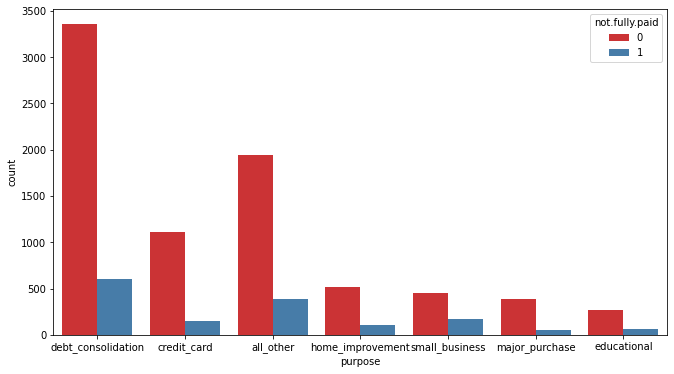

In [8]:
# checking 'not.fully.paid' column distributed with categorical column "purpose", 
cntplot, ax = plt.subplots(figsize=(11, 6))
sns.countplot(x="purpose", hue="not.fully.paid", data=raw_data, palette="Set1")

<Figure size 792x504 with 0 Axes>

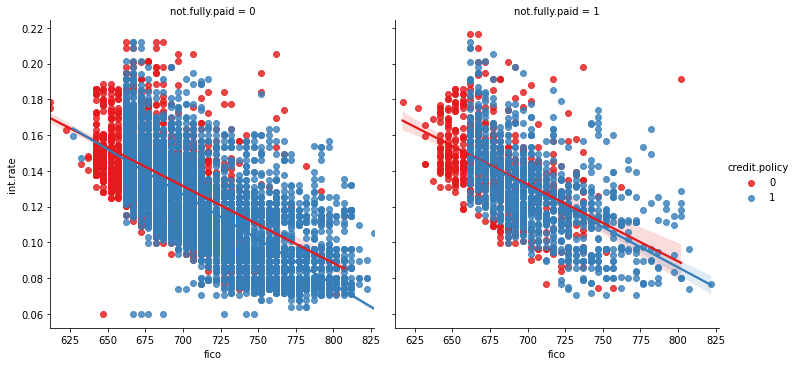

In [9]:
# basic lmplot visualization
plt.figure(figsize=(11,7))
sns.lmplot(data=final_data, x='fico', y='int.rate', col='not.fully.paid', hue='credit.policy', palette='Set1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74d4109950>,
      dtype=object)

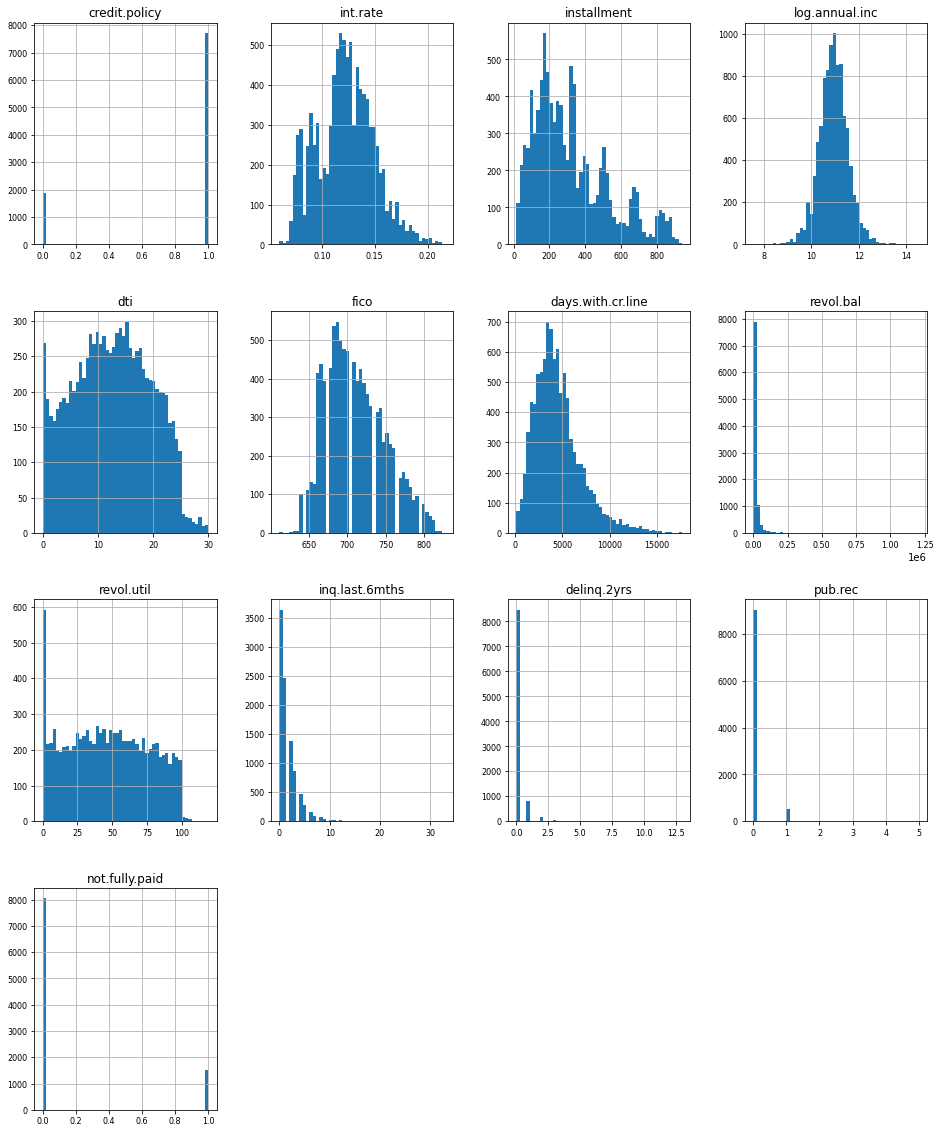

In [10]:
# visualizing numerical column feature distribution using hist
hist_data = final_data.select_dtypes(include = ['float64', 'int64'])
hist_data.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

In [11]:
# final_data.drop('pub.rec', inplace=True, axis=1)
# final_data.drop('delinq.2yrs', inplace=True, axis=1)

# credit underwriting
final_data['credit.policy'].value_counts(normalize=True)

1    0.80497
0    0.19503
Name: credit.policy, dtype: float64

In [12]:
final_data['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64


```
'credit.policy'
credit underwriting criteria of LendingClub.com is 80%
not met/defaulters  is 20%

dataset is imbalanced.
```



### 3. check the correlation between features and will drop those features which have a strong correlation

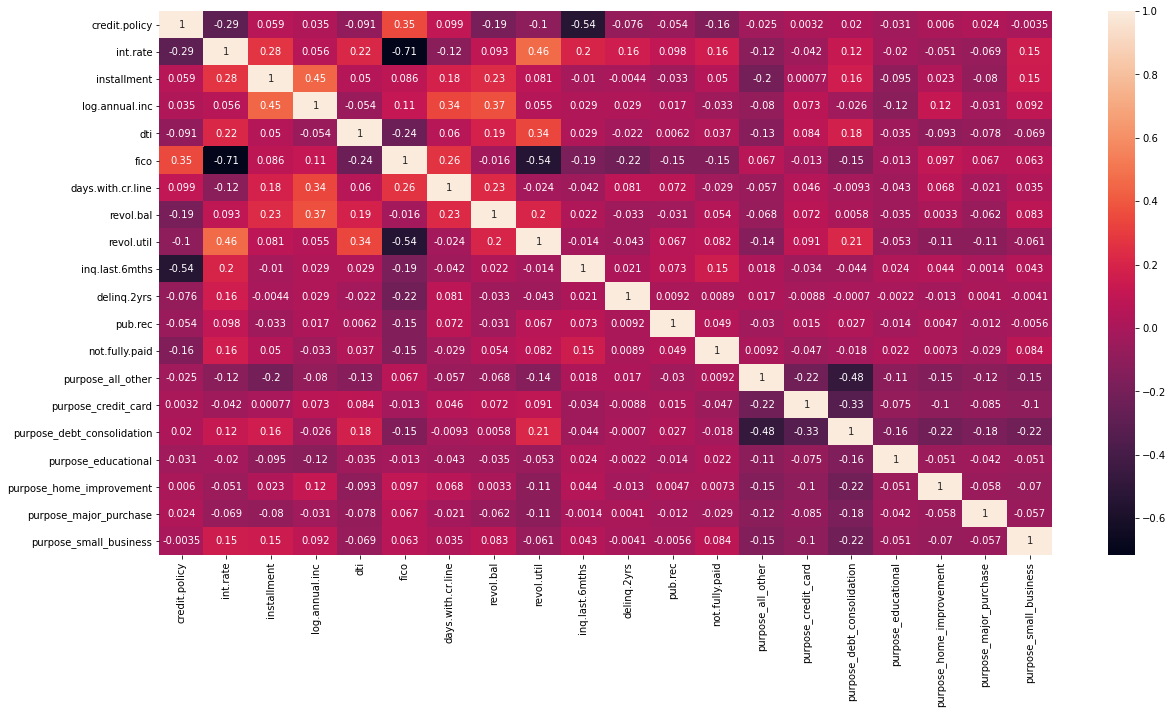

In [13]:
corr_data = final_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_data, annot=True)

`since the correlation values are with in the range of low correlation range of < 0.5, there is no need to drop any features.`

### 4. Modeling

In [105]:
# seperate feature and label
feature = final_data.drop(['credit.policy'], axis=1)
label = final_data['credit.policy']

# normalization
from sklearn.preprocessing import RobustScaler
feature_scaler = RobustScaler()
feature_scaled_data = feature_scaler.fit_transform(feature)

# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled_data, label,
                                                    test_size=0.2,
                                                    random_state=60)

print(X_train.shape)
print(y_train.shape)

(7662, 19)
(7662,)


In [107]:
# model

model = tf.keras.models.Sequential()
# no of units = 3 * no of columns in feature (19)
model.add(tf.keras.layers.Dense(units=57, activation="relu", input_shape=(19,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=76, activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=76, activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [108]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"]
              )

In [109]:
# Create Custom EarlyStopping Condition --- Callbacks
# I want my model to be generalized and my testScore >= CL
# Assume for this use-case : SL = 0.05
# CL = 1 - SL = 0.95


class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallback,self).__init__()
        self.cl=cl
        
    def on_epoch_end(self, epoch, logs=None):
        testScore = logs['val_accuracy']
        trainScore = logs['accuracy']
        
        if testScore > trainScore and testScore >= self.cl:
            self.model.stop_training = True

In [110]:
# CL = 0.95
model.fit(X_train,
          y_train,
          epochs=1000,
          validation_data=(X_test, y_test),
          callbacks=[MyThresholdCallback(cl=0.98)])

Epoch 1/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.8979 - val_loss: 0.1908 - val_accuracy: 0.9254
Epoch 2/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2075 - accuracy: 0.9148 - val_loss: 0.1580 - val_accuracy: 0.9332
Epoch 3/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.1838 - accuracy: 0.9287 - val_loss: 0.1166 - val_accuracy: 0.9562
Epoch 4/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.1623 - accuracy: 0.9390 - val_loss: 0.1160 - val_accuracy: 0.9577
Epoch 5/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.1505 - accuracy: 0.9451 - val_loss: 0.1492 - val_accuracy: 0.9447
Epoch 6/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9512 - val_loss: 0.1066 - val_accuracy: 0.9562
Epoch 7/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.1281 - accuracy: 0.9521 - val_loss: 0.0957 - val_accuracy:

In [111]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 57)                1140      
_________________________________________________________________
dropout_39 (Dropout)         (None, 57)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 76)                4408      
_________________________________________________________________
dropout_40 (Dropout)         (None, 76)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 76)                5852      
_________________________________________________________________
dropout_41 (Dropout)         (None, 76)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 1)               

In [112]:
print("Training Score is {} and Testing score is {}".format(model.evaluate(X_train,y_train)[1],
                                                            model.evaluate(X_test,y_test)[1]))

60/60 [==============================] - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9807
Training Score is 0.9795092940330505 and Testing score is 0.9806889295578003


In [113]:
# predict
y_pred = model.predict_classes(X_test)

# apply confusion matrix on the model.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 345   33]
 [   4 1534]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [114]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       378
           1       0.98      1.00      0.99      1538

    accuracy                           0.98      1916
   macro avg       0.98      0.96      0.97      1916
weighted avg       0.98      0.98      0.98      1916





```
a) dataset is highly imbalanced with most of the records are of credit underwriting.

b) model accuracy: 98%

c) customers meet credit underwriting of lending club [1] - 99% [fl score]

d) customers doesn't meet credit underwriting of lending club [0] - 95% [f1 score]


```

### Tolerance
#### If a non-defaulter is predicted as a defaulter, then the company will lose a valuable customer. Hence, FNs cannot be tolerated.
#### Area of focus = FN
#### Pairs to look at: Precision0 & Recall1

* Precision0 = 0.99
* Recall1 = 1.0
* Average of Precision1 & Recall0 = 0.995

The model has given a really good tolerance value and hence the model is accepted.